In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## CSV파일 로드

In [2]:
df = pd.read_csv("/Users/ohheungchan/workspace/AI_Study/abalone.csv")
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


## 결측치 확인

In [3]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

### 컬럼 설명

1. **Sex**: 전복의 성별 (M: 수컷, F: 암컷, I: 새끼)
2. **Length**: 전복의 최대 길이 (밀리미터 단위)
3. **Diameter**: 전복의 지름, 길이에 수직인 측정치 (밀리미터 단위)
4. **Height**: 전복의 높이, 껍질 속 고기 포함 (밀리미터 단위)
5. **Whole weight**: 전복 전체의 무게 (그램 단위)
6. **Shucked weight**: 전복 고기의 무게 (그램 단위)
7. **Viscera weight**: 전복의 내장 무게, 출혈 후 측정 (그램 단위)
8. **Shell weight**: 건조 후 전복 껍질의 무게 (그램 단위)
9. **Rings**: 전복의 고리 수, 나이 추정의 기준 (+1.5년)

In [7]:
df.info

<bound method DataFrame.info of       Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
id                                                                  
0       2   0.455     0.365   0.095        0.5140          0.2245   
1       2   0.350     0.265   0.090        0.2255          0.0995   
2       0   0.530     0.420   0.135        0.6770          0.2565   
3       2   0.440     0.365   0.125        0.5160          0.2155   
4       1   0.330     0.255   0.080        0.2050          0.0895   
...   ...     ...       ...     ...           ...             ...   
4172    0   0.565     0.450   0.165        0.8870          0.3700   
4173    2   0.590     0.440   0.135        0.9660          0.4390   
4174    2   0.600     0.475   0.205        1.1760          0.5255   
4175    0   0.625     0.485   0.150        1.0945          0.5310   
4176    2   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  
id                        

In [6]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

### 인코딩 (문자->수치)

In [4]:
# 'Sex'컬럼의 F/M을 수치화
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Sex'] = label.fit_transform(df['Sex'])

(M->0, F->2, I->1)

/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_10813/2749004283.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rings', data=df, palette='Set3')


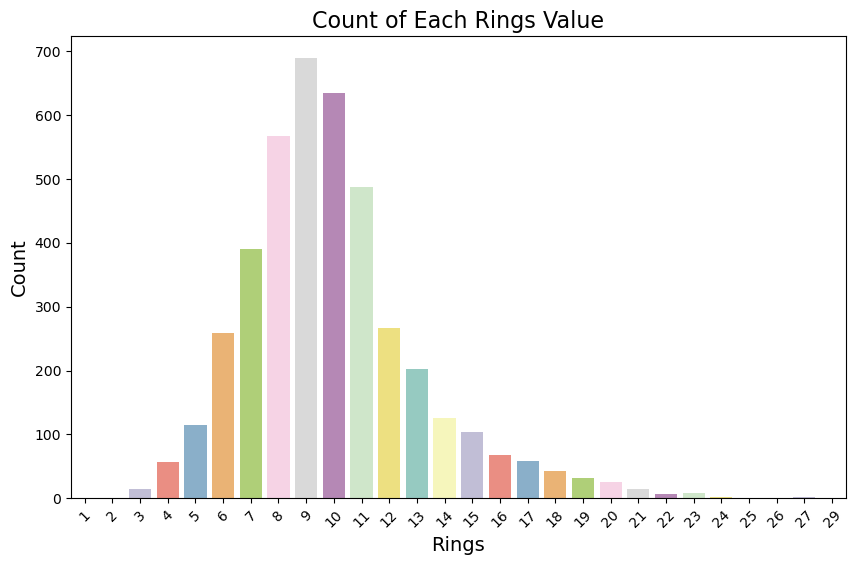

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# 카운트플롯 그리기
plt.figure(figsize=(10, 6))
sns.countplot(x='Rings', data=df, palette='Set3')
plt.title('Count of Each Rings Value', fontsize=16)
plt.xlabel('Rings', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)  # x축 값이 겹치지 않도록 회전
plt.show()

## 각 피쳐간의 상관관계를 확인.

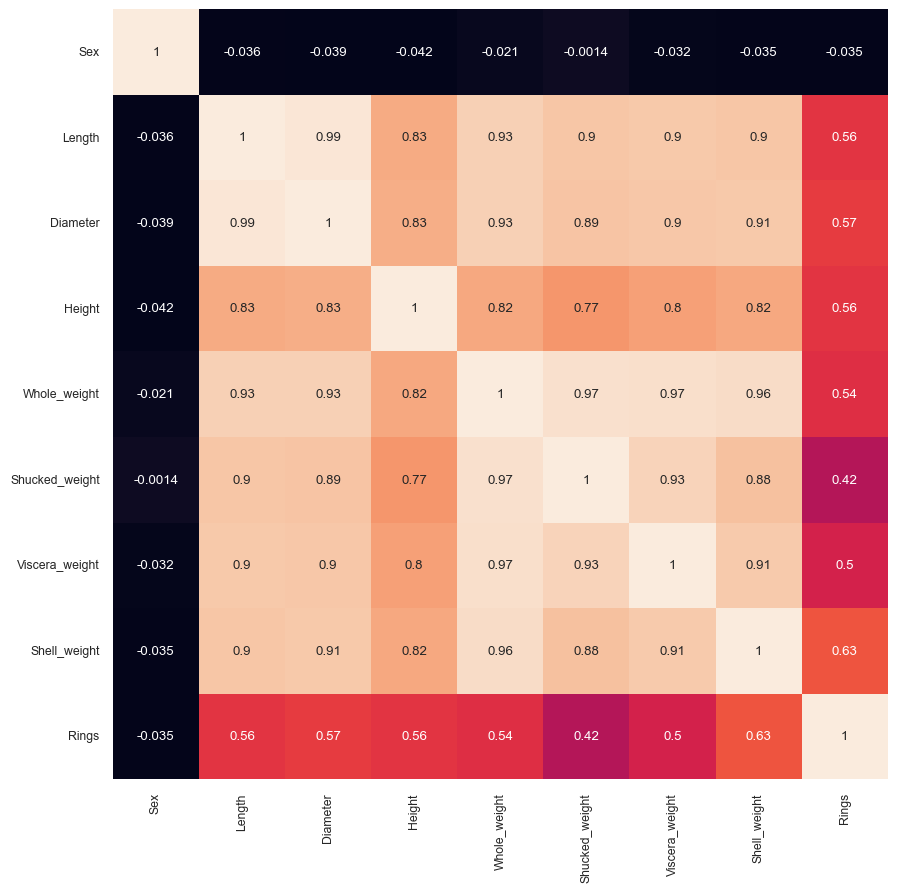

In [13]:
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [11]:
y = df["Rings"]
y 

id
0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [12]:
x = df.drop("Rings" , axis = 1)
x

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(x,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3341, 8) (3341,)
(836, 8) (836,)


In [18]:
#전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)



In [29]:
# DT

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeRegressor

clf_dt = DecisionTreeRegressor()
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print(clf_dt.score(X_train, y_train))
print(pred_dt)
mse = np.sqrt(mean_squared_error(pred_dt, y_test))
print('----------MSE----------')
print('평균제곱근오차', mse)

1.0
[10. 12. 10. 17.  9. 10. 14. 14. 10.  8.  8.  8. 10. 10.  9.  9.  7.  7.
 10. 10. 11.  6.  7.  8. 14. 10. 14.  9. 16.  9. 10.  7.  9.  7. 14.  9.
  8.  9.  9.  7.  8. 10.  8. 10.  7. 11. 11.  7.  9.  8. 10.  8.  9. 14.
 10.  5. 15.  9.  8. 10. 10. 16. 10. 10.  9.  6.  5. 10. 16. 10. 11.  9.
 11. 13.  9. 11. 11.  8. 10.  8.  9.  9. 10. 27. 11. 11. 13.  9. 11.  5.
 11. 13. 11.  7. 10.  8. 10.  8. 12.  9. 12. 10.  9.  9. 10.  6. 12. 10.
 10.  7.  7. 12. 13. 10.  7.  9.  9. 11.  9.  8.  9.  7.  6.  6. 13.  7.
  8. 20. 16.  7. 15.  4.  9.  9. 10. 10.  7.  8.  9.  7.  5. 13.  9. 13.
 10. 10.  8.  6. 12. 20.  9. 17. 11.  9. 13.  7.  9. 11.  6. 17.  9.  9.
 10. 11.  8.  7. 11.  9. 10. 11.  5.  8.  7. 11. 10.  7.  6.  8.  8.  9.
 11. 13. 10. 10. 11. 13. 12.  4. 16.  8.  7. 13.  6. 13.  8.  9.  7.  9.
  7.  6.  9. 11.  9.  8. 12.  7.  9. 14.  4.  8. 11.  9. 12. 14.  9.  7.
  6.  6.  6.  7. 10.  5.  9. 11.  7.  8. 10.  5.  8. 14.  7.  8.  8.  5.
 14.  6.  8.  6.  6. 17. 11. 12.  6.  9.  9. 15

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)
print(model.score(X_train, y_train))
print(ly_preds)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('----------MSE----------')
print('평균제곱근오차', mse)

0.5157958299216334
[10.43763374 13.74097618 10.57649622 11.76013719  9.36533076  9.00702555
  9.97402791  8.12376697  8.51032874  9.26128594 10.36774102  8.14989242
  7.83520742 10.23715865  9.38191595 11.70632799  7.87783769  9.06817351
  7.22562509  9.57414462 13.44967905  6.80476608  7.00090079 10.13895858
 10.875915    9.25451472 11.11306098 11.42669156 13.31423814  8.89381976
 10.90790448  6.33302112 11.92415942  7.52732765 12.46869183  9.3239183
  7.84979679  7.5875818   9.41183813 11.73742917  8.48430761 14.06078336
  7.75033118 11.13760667  7.9205034   7.59891447 10.41806743  8.14382432
 10.23157849  9.22601695 10.76150268  9.14352662  9.22623041 13.32792944
 10.09946968  5.87347398 13.04252979 11.55085185  8.70109718  9.45620737
  9.87812964 11.01894562 10.14054854 11.65531045  8.88184626  8.61492075
  6.38669154  9.84491741 12.21995415  8.21800285 10.71863391  9.23609269
 12.48091005 12.22337429  7.59749414  7.96752712  8.34443305  7.8656904
  8.61707641  7.57725189  9.254074

In [38]:
#RF
from sklearn.ensemble import RandomForestRegressor

rf_clf = RandomForestRegressor()
rf_clf.fit(X_train, y_train)

pred_rf = rf_clf.predict(X_test)

print(rf_clf.score(X_train, y_train))
print(pred_rf)
mse = np.sqrt(mean_squared_error(pred_rf, y_test))
print('----------MSE----------')
print('평균제곱근오차', mse)

0.9333194871583186
[10.42 15.01 10.58 11.91  9.42  9.57 12.76 10.55  8.38  8.47 10.73  7.69
  8.28 11.91  9.78 10.47  6.79  8.87  8.62  9.22 12.62  6.12  6.75  9.45
 11.85  9.28 13.97 10.82 14.94  8.82 12.68  5.99 10.69  6.87 14.81  8.49
  7.66  8.46 10.59 10.71  8.18 13.26  8.1  11.26  9.4  10.96  9.73  7.85
 10.75  8.34 10.71  8.94 10.83 14.39 10.64  5.06 13.42 11.49  7.82 10.51
 10.07 11.24  8.83 10.95 11.27  7.37  6.76  9.75 13.78 10.97 10.73  9.62
 11.17 12.09  8.42  9.19  9.02  8.09  9.12  7.11 10.34  8.96 10.08 19.38
 10.55 11.48 14.1   9.01  9.88  6.07 10.18 11.84 11.89  7.14 10.45 11.35
 13.95  7.17 10.96 10.54 12.2   9.75  8.43  9.02 10.5   7.4  11.53 11.05
  8.99  6.05  8.31 12.93 11.07 10.91  7.01  9.03  9.06 10.49 10.38  8.11
  8.69  7.    4.68  8.67 15.85  8.87  8.61 15.36 12.76  9.67  9.93  4.22
 10.1   9.54  9.99 11.24  6.55  8.93 10.8   7.79  4.67 12.95  9.68 11.38
  9.21 13.2   8.32  8.   11.   16.48  6.55 12.82 10.72  9.87 10.27  8.93
 14.41 10.83  8.19 13.75  8.01 1

In [39]:
#SVM
from sklearn.svm import SVR

clf_svm = SVR()
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print(clf_svm.score(X_train, y_train))
print(pred_svm)

mse = np.sqrt(mean_squared_error(pred_svm, y_test))
print('----------MSE----------')
print('평균제곱근오차', mse)

0.47952705847013266
[10.24431042 11.96733014 10.33735702 10.83862596  9.54394357  9.46193405
 10.01752338  8.94784694  9.26625927  8.67942327  9.87746803  7.60436452
  8.75815    10.10273923  9.63369974 10.70541217  6.94427806  9.42843801
  7.59973271  9.36822045 12.15956251  5.91639449  6.20874795  9.75458028
  9.61163038  9.32226618 10.69692162 10.8663445  11.69574589  9.15046533
 10.37936665  5.64079974 11.36064765  6.67666981 11.17651023  9.19264516
  7.59211089  7.88694875 10.96833312 10.71571529  7.6258969  12.45948681
  7.98734511 10.32835305  8.8946209  10.10208333  9.8174344   7.48498861
 10.89432214  8.55883957 10.17029537  9.42957262  9.98910804 12.0428361
 10.43264375  6.7427279  11.69939322 10.66925135  8.06776548  9.40682837
 10.18198023 10.24397087  9.34487805 10.65687087  9.18972571  7.64967996
  5.62517968  9.66947416 11.4536925   9.04878957 10.18951045  9.49805641
 11.53716231 11.82680952  8.66561981  8.07048098  8.15508578  8.04660951
  8.5223336   7.11599839  9.2266

In [40]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(X_train , y_train)
pred_knr = knr.predict(X_test)
print(knr.score(X_train , y_train))
print(pred_knr)
mse = np.sqrt(mean_squared_error(pred_knr, y_test))
print('----------MSE----------')
print('평균제곱근오차', mse)

0.6615519992259602
[10.  14.4 10.  10.  10.4  9.4 11.2 10.   8.4  8.6 11.   7.6  9.4 11.
  9.6  9.6  6.8  9.8  7.8  8.2 13.2  5.8  6.6  9.8  9.   9.4 10.8  9.6
 14.4  8.4 10.2  5.8 11.2  6.8 13.6  9.2  8.4  8.2 11.6 10.6  7.2 12.4
  7.2  9.8  8.  10.4  9.   7.4 10.8  8.  10.  10.8 11.  14.8  9.4  5.6
 12.2 11.   7.8 10.6 10.  11.  10.4 10.8 10.   6.8  5.8  9.2 12.4 10.8
 10.8  9.  11.4 13.   8.4  9.6  8.8  7.   8.6  7.2 10.4  9.4 10.6 17.4
 10.4 13.6 11.   8.2 10.8  5.6  9.4 10.4  9.8  6.4 11.2 10.4 11.4  7.
 10.8 10.8  9.   9.   8.   9.4  9.6  7.4 11.6 10.8  8.8  6.4  9.  12.
 13.  11.4  7.6  8.4  9.2 10.4  9.   7.6  7.2  6.6  4.2  9.8 14.2  9.8
  8.8 15.4 12.4  9.6  8.2  4.8 10.2  9.6 10.  10.4  6.4  9.2 11.6  9.
  4.2 13.2  9.8 13.2  8.8 10.4  8.4  9.8 11.  14.4  6.2 11.8  9.8 10.
 10.2  9.6 12.  13.   8.4 13.   6.6 12.8  9.8  9.8 11.   7.4  9.8  9.8
 12.4 10.   4.6  9.8  7.  10.8  9.4  7.   5.8 10.6 10.4  9.2  8.8 11.4
  8.   8.6 12.8 12.4 10.8  6.4 11.8  9.   6.8 10.   9.  12.2  8